# HCI Week 1 - Fourier Transform Optics
*Matthew Kenworthy // Leiden Observatory*

This is a Python notebook. A notebook contains a series of cells, which can contain Python code, or text.

If you need an introduction to Python and Python notebooks, look at [Getting started with Python for science](http://www.scipy-lectures.org/intro/)

The current cell is surrounded by a green or gray box. A green box means you are editing the cell **edit mode**, and a gray box means you are in the **command mode**.

Preesing `Enter` allows you to edit the current cell, and change its contents. Press `Escape` to leave the editing mode.

To **run** a cell, press the `play` button on the toolbar above, or press `Shift+Enter` on your keyboard.


Load in Python modules into the notebook:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rc('image', interpolation='nearest', origin='lower')


`numpy` is a Python module that we will be using for our image analysis.

`matplotlib.pyplot` is a module to plot out graphs and image data.

The `%matplotlib inline` means that when we plot something out in the Python notebook, it will appear below the cell when we run it:
    

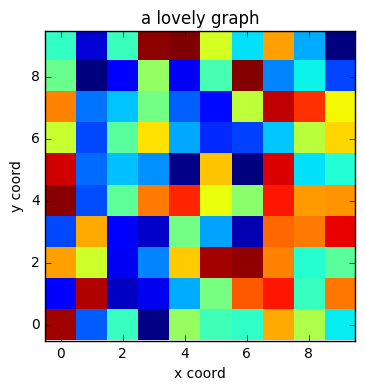

In [2]:
plt.imshow(np.random.random((10,10)))
plt.xlabel('x coord')
plt.ylabel('y coord')
plt.title('a lovely graph')

You can also define functions, which contain code that you can reuse. Here we define several functions we use later to work with Fourier optics. Look at the structure of the functions to see how they are written.

In [3]:
def displC(c,trim=0):
    # displC - display a Complex number c as four plots
    #          as a (Real, Imaginary) pair and as
    #          an (Amplitude, Phase) pair
    #          optionally cut out the central square with size 'trim x trim' pixels   
    c2 = np.copy(c)
    if (trim>0): # if the user specifies a trim value, cut out the centre of the image
        (nx,ny) = c.shape
        dx = int((nx-trim) / 2 + 1)
        dy = int((nx-trim) / 2 + 1)
        c2 = c[dx:dx+trim,dy:dy+trim]
        
    # set up the plot panels
    fig=plt.figure(figsize=(10,8))
    axre = fig.add_subplot(221)
    axim = fig.add_subplot(222)
    axamp = fig.add_subplot(223)
    axpha = fig.add_subplot(224)
    # plot out the panels
    im = axre.imshow(c2.real)
    im = axim.imshow(c2.imag)
    im = axamp.imshow(np.abs(c2))
    im = axpha.imshow(np.angle(c2))
    
    axre.set_title('Real')
    axim.set_title('Imag')
    axamp.set_title('Amplitude')
    axpha.set_title('Phase')
    plt.show()

def padcplx(c,pad=5):
    # padcplx - puts a Complex array in the centre of a zero-filled Complex array
    #           pad defines the padding multiplier for the output array
    (nx, ny) = c.shape
    bignx = nx*pad + 1
    bigny = ny*pad + 1
    big_c = np.zeros((bignx,bigny),dtype=complex)

    dx = int((nx * (pad-1)) / 2 + 1)
    dy = int((ny * (pad-1)) / 2 + 1)

    big_c[dx:dx+nx,dy:dy+ny] = c
    return(big_c)

def FFT(c,pad=5):
    """FFT - carry out the complex Fourier transform (with optional padding)
    and return the FFT padded array"""
    from numpy.fft import fft2,fftshift,ifft2,ifftshift
    psfA = ifftshift(fft2(fftshift(padcplx(c,pad))))
    return psfA
    

## Useful numpy commands 

One useful command is the `mgrid` command. It produces an array with X values and an array with Y values. These can be used as X and Y coordinates in evaluating a function across an image. Read the numpy documentation for details, or use the online help. `imshow` and `plot` display data in a plot shown below the cell.

[[ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]]


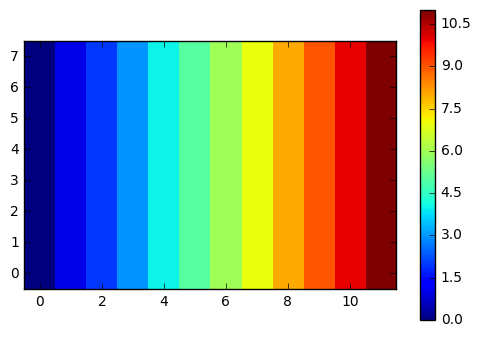

In [4]:
y,x = np.mgrid[0:8,0:12]
print(x)
plt.imshow(x)
plt.colorbar()

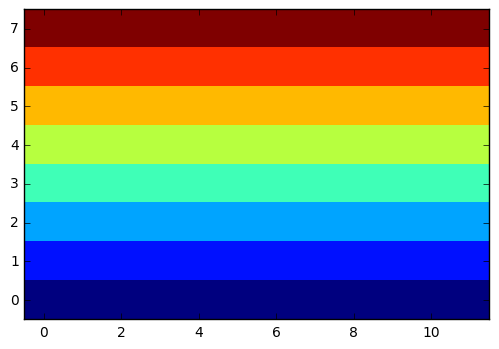

In [5]:
plt.imshow(y)
#y.shape
#y.size

## Making Masks and Shapes


What can you do with these arrays? You can evaluate functions in one simple step with no `for` loops like more traditional computer languages. These functions can then act as shapes with which to define masks for use in making telescope pupils, later on in the workbook.

For example, you can see what the function $x+2y$ is for all pixels in an image:

[[ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 2  3  4  5  6  7  8  9 10 11 12 13]
 [ 4  5  6  7  8  9 10 11 12 13 14 15]
 [ 6  7  8  9 10 11 12 13 14 15 16 17]
 [ 8  9 10 11 12 13 14 15 16 17 18 19]
 [10 11 12 13 14 15 16 17 18 19 20 21]
 [12 13 14 15 16 17 18 19 20 21 22 23]
 [14 15 16 17 18 19 20 21 22 23 24 25]]


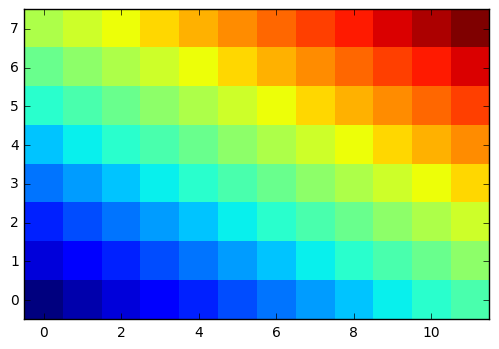

In [6]:
plt.imshow(x+2*y)
print (x+2*y)

In this way, you can make a mask showing where all the points in an image satisfy the equation $x+2y<8$

[[ True  True  True  True  True  True  True  True False False False False]
 [ True  True  True  True  True  True False False False False False False]
 [ True  True  True  True False False False False False False False False]
 [ True  True False False False False False False False False False False]
 [False False False False False False False False False False False False]
 [False False False False False False False False False False False False]
 [False False False False False False False False False False False False]
 [False False False False False False False False False False False False]]


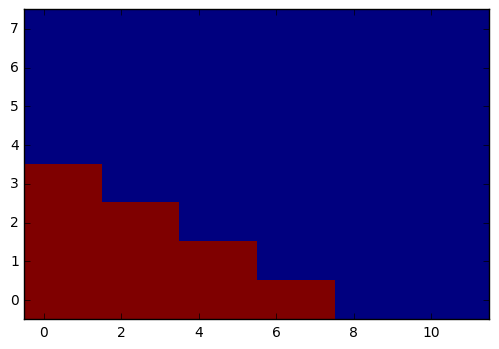

In [7]:
inequality = (x + (2*y) < 8)
print(inequality)
plt.imshow(inequality)

The `inequality` contains True and False values which appear as white and dark squares in `imshow`.

**IMPORTANT** note how the printout has the origin in the top left, but the plot has it in the lower left!

**Q1 (2 points):** The equation for a circle centered at $(0,0)$ with radius 6 is $x^2 + y^2 < 6^2$. Display this equation for $x$ and $y$ as defined in the previous section.

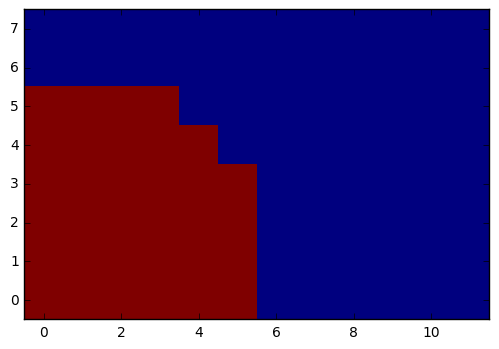

In [8]:
#X and Y arrays are created.Circle with radius 6 is also created.

y,x    = np.mgrid[0:8,0:12]
Circle = x**2 + y**2 < 6**2
plt.imshow(Circle)

**Q2 (4 points):** The equation for points within a circle at an arbitrary location $(x_c,y_c)$ and radius $r$ is $(x-x_c)^2 + (y-y_c)^2 < r^2$. Write a function that takes in a 2D array `im`, $x_c, y_c$ and $r$ and returns an array with the same shape as the input 2D array. Show that it works by putting a circle of radius 5.2 with centre (7.6, 10.3) in an array that is 35 by 25 pixels and show the results with `imshow`. **NOTE** the output image should **NOT** overwrite the input image!

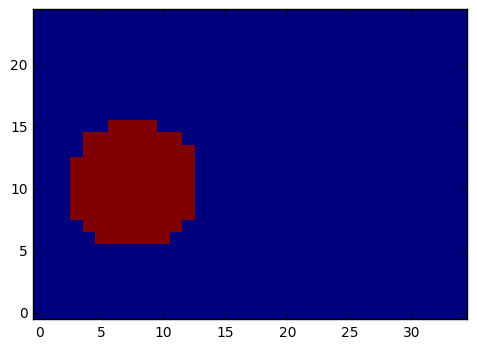

In [9]:
#Function of a Circle with arbitrary location
#Xc = x-axis center, Yc = y-axis center, R = Circle radius

def Arbitrary_circle(x, y, Xc, Yc, R):
    return (x - Xc)**2 + (y - Yc)**2 < R**2

#Variables
Xc       = 7.6
Yc       = 10.3
y_1, x_1 = np.mgrid[0:25, 0:35]  # Creating the new grid of 35x25 pixels
R        = 5.2

#Display Image
plt.imshow(Arbitrary_circle(x_1, y_1, Xc, Yc, R))

## Simulating PSFs with Fourier Optics


A simple imaging lens forms an image of the sky on a detector.

The lens converts incoming wavefronts of light into angular positions recorded on a detector.

In the Fraunhoffer limit, the wavefront incident on the lens described by the electric field $\mathbf{E}$ and the resultant electric field at the detector is given by the Fourier transform of $E_{det}=FT(\mathbf{E})$, where $FT$ is the Fourier transform operator.

This can be represented by a complex number $\mathbf{E} = E.e^{(i\phi)}$, where $E$ and $\phi$is are real numbers and $\mathbf{E}$ is a complex number containing both the electric field amplitude and phase.

`numpy` can work with complex numbers, so you can build a complex array by using the letter `j` to represent the imaginary constant.

We make a square aperture 21 pixels on a side with zero phase across it, and then carry out an $FT$:


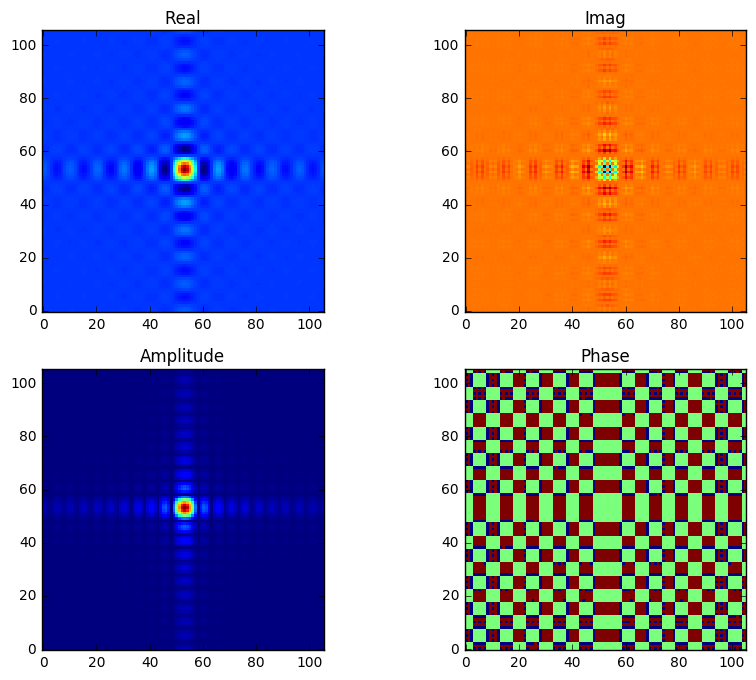

In [10]:
npix = 21

y_2,x_2 = np.mgrid[:npix, :npix]


ampli = np.ones_like(y_2)
phase = np.zeros_like(y_2)

# make the complex amplitude E
E = ampli * np.exp(1j*phase)

# carry out the FT of E and add a spatial sampling of 5 by default
Edet = FFT(E,5)

# display the central part of Edet
displC(Edet)

The function `displC` plots out the complex image Edet in two formats - the real and Imaginary components, and as the complex exponential notation with an Amplitude and Phase.

You can also calculate the **intensity** as seen on a detector by calculating the modulus squared:

$I_{det} = \|E_{det}\|^2 = E_{det} . conj(E_{det})$ = np.abs(E) * np.abs(E)

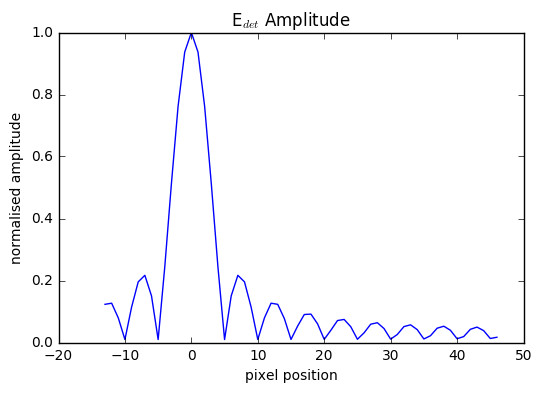

In [11]:
Edet_ampl = np.abs(Edet)

# normalise to the brightest pixel
Edet_ampl = Edet_ampl / np.max(Edet_ampl)


Idet = Edet_ampl * Edet_ampl

# get central row in Edet and Idet
nx, ny = Edet_ampl.shape

yy, xx = np.mgrid[:nx,:ny]

xc = int((nx + 1)/2.)
yc = int((ny + 1)/2.)

# central pixel is at yy,xx = (0,0)
yy = yy - yc
xx = xx - xc

plt.plot(xx[xc,40:100],Edet_ampl[xc,40:100])
plt.title(r'E$_{det}$ Amplitude')
plt.xlabel('pixel position')
plt.ylabel('normalised amplitude')

**Q3 (2 points): ** Plot the normalised intensity across the centre of $E_{det}$. Estimate the height of the first sidelobe to the central peak by adjusting the y scale of the plot using `plt.ylim()`. Label your x and y axes on the plot using `plt.xlabel()` and `plt.ylabel()`

  

The maximum is 0.0469662:


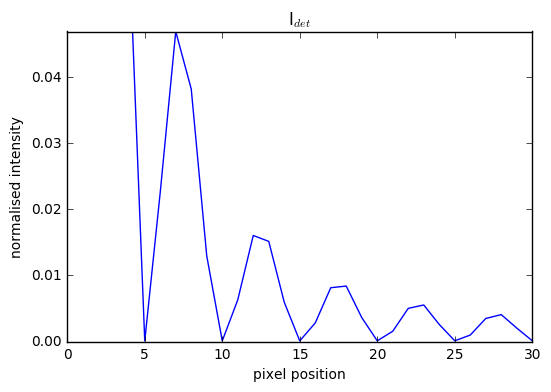

In [12]:
#Using the center of Edet for Idet

plt.plot(xx[xc,:], Idet[xc,:])
plt.title(r'I$_{det}$')
plt.xlabel('pixel position')
plt.ylabel('normalised intensity')
plt.ylim(0, max(Idet[xc,60:65])) 
plt.xlim(0, 30)
         #Adjusting y-scale to see the first sidelobe.
         #First plot was done from 40:100 pixels. The first sidelobe is between 5 and 10 which in pixels
         #translates to adding 15 from the center. Thus, we look for the maximum around 60:65.  
print('The maximum is %g:'%(max(Idet[xc,60:65])))  

#As we have normalised, we can say the height of the first sidelobe is ~4.69% of the central peak.

**Q4 (2 points):** Plot the same quantity as above but on a logarithm 10 scale (do a Google search for the numpy function to get a logarithm). Where are the minima located (measured in pixels) from the central peak?


The first minimum is at 5 pixels from the peak:


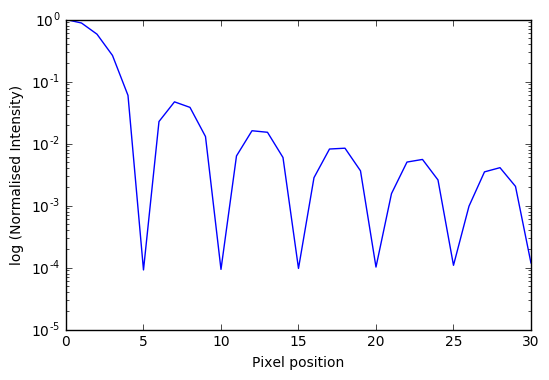

In [13]:
#Same as before but in logarithm 10 scale

plt.plot(xx[xc,:], Idet[xc,:])
plt.yscale('log')              #Setting log10 scale for y-axis
plt.xlabel('Pixel position')
plt.ylabel('log (Normalised Intensity)')
#plt.ylim(0, max(Idet[xc,60:65])) 
plt.xlim(0, 30)
Minimum = min(Idet[xc,55:64])
Max = max(Idet[xc,:])
print('The first minimum is at %g pixels from the peak:'%(np.where(Idet[xc,:] == Minimum)[0] - np.where(Max == Idet[xc,:])[0]))       

#The minima are located at 5, 10, 15, 20, 25 ... pixels from the central peak.

**Q5 (2 points):** Change the sampling factor (currently 5) in the `FFT(E,5)` function to different integers. What happens to the pixel locations of the minima?

The minimum location in pixels is 8 for a samplin of 8:
The minimum location in pixels is 9 for a samplin of 9:
The minimum location in pixels is 10 for a samplin of 10:


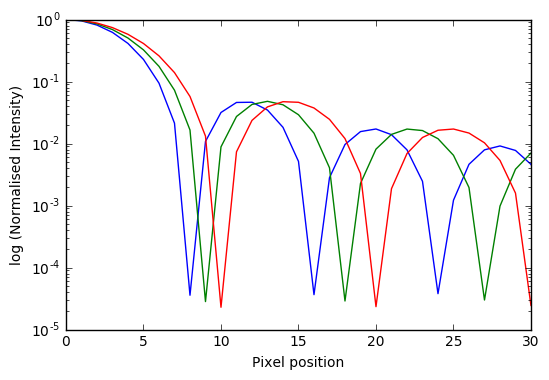

In [14]:
#Changing the sampling factor between 8-10.

for i in range(8,11):
    Edet = FFT(E,i)            #Changing the sampling factor
    Edet_ampl = np.abs(Edet)

#Normalise to the brightest pixel
    Edet_ampl = Edet_ampl / np.max(Edet_ampl)

    Idet = Edet_ampl * Edet_ampl

#Get central row in Edet and Idet
    nx, ny = Edet_ampl.shape

    yy, xx = np.mgrid[:nx,:ny]

    xc = int((nx + 1)/2.)
    yc = int((ny + 1)/2.)

# central pixel is at yy,xx = (0,0)
    yy = yy - yc
    xx = xx - xc

    Minimum          = min(Idet[xc,:])  #Finding the absolute minimum
    Maximum          = max(Idet[xc,:])  #Finding the absolute maximum
    Minimum_Location = np.where(Idet[xc,:] == Maximum)[0] - np.where(Idet[xc,:] == Minimum)[0]
                       #Number of pixels from the maximum 
        
    plt.plot(xx[xc,:], Idet[xc,:])
    plt.yscale('log')              #Setting log10 scale for y-axis
    plt.xlabel('Pixel position')
    plt.ylabel('log (Normalised Intensity)')
    plt.xlim(0, 30) 
    print('The minimum location in pixels is %g for a samplin of %i:'%(Minimum_Location[0], i)) 
    
#The first minimum position is at a distance from the central maximum given by the sampling factor.
#They are multiples of the sampling factor.


**Q6 (2 points): ** Make a circular pupil (the telescope pupil) with diameter 101 pixels, and calculate the PSF (equivalent to calculating $I_{det}$) and display it with `displC()` 

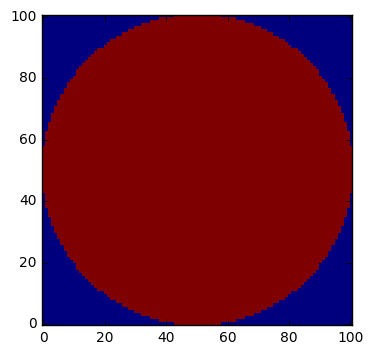

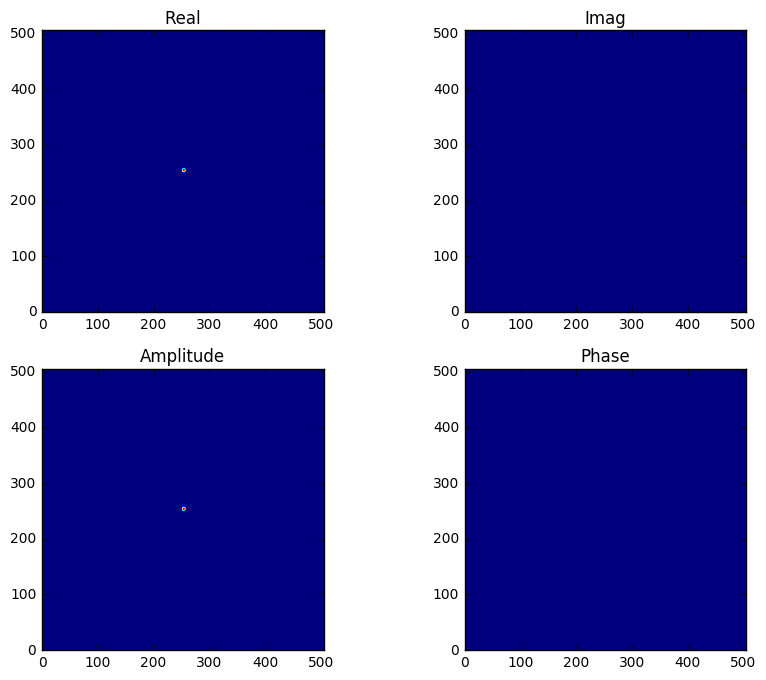

In [15]:
#Creating a circular pupil of 101 pixels diameter

npix_1 = 101 

x_3,y_3 = np.mgrid[:npix_1, :npix_1]

ampli_2 = np.ones_like(x_3)
phase_2 = np.zeros_like(y_3)

#Make the complex amplitude E
E_2 = ampli_2 * np.exp(1j*phase_2)

#Carry out the FT of E and add a spatial sampling of 5 by default
Radius = npix_1/2.0
Circle_1 = Arbitrary_circle(x_3, y_3,50,50,Radius)
plt.imshow(Circle_1)
Edet_2 = FFT(Circle_1,5)
Edet_ampl_2 = np.abs(Edet_2)
# computing Idet
Idet_2 = Edet_ampl_2 * Edet_ampl_2

nx2, ny2 = Edet_ampl_2.shape
yy2, xx2 = np.mgrid[:nx2,:ny2]
xc2 = int((nx2 + 1)/2.)
yc2 = int((ny2 + 1)/2.)
    
yy2 = yy2 - yc2
xx2 = xx2 - xc2

# display the central part of Idet
displC(Idet_2)

**Q7 (2 points):** Normalise the PSF and use `displC` to display the log10 of the PSF. Plot out the central row showing the peak of the PSF, in linear and log10 units.

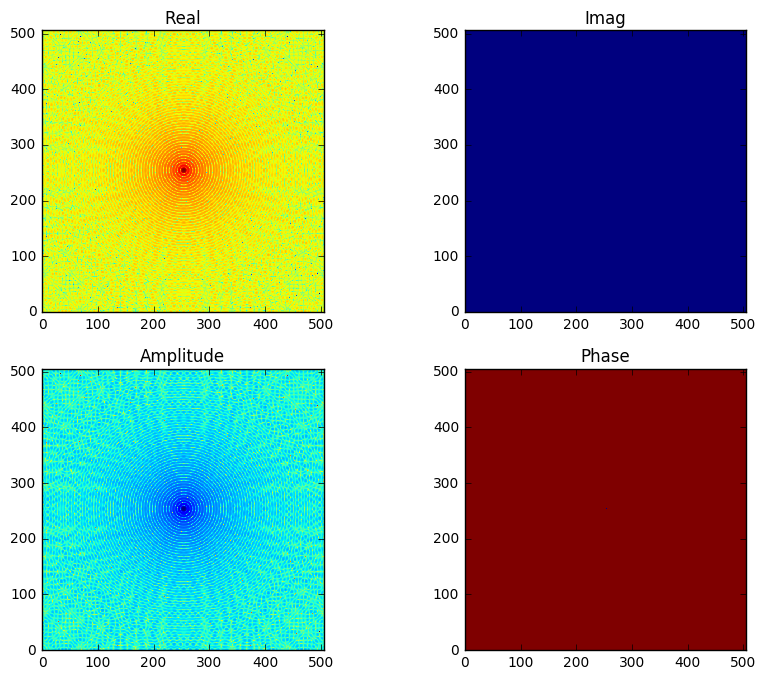

(-100, 100)

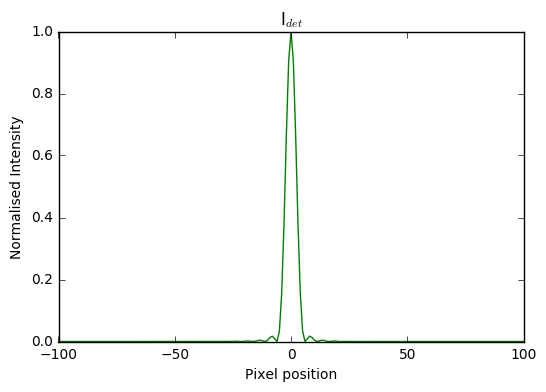

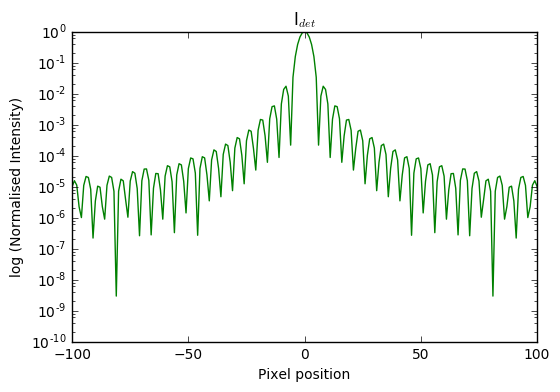

In [16]:
#Normalise to the brightest pixel
Idet_3 = Idet_2 / np.max(Idet_2)
displC(np.log10(Idet_3))

plt.figure()
plt.plot(xx2[xc2,:], Idet_3[xc2,:], c = 'g')
plt.title('I$_{det}$')
plt.xlabel('Pixel position')
plt.ylabel('Normalised Intensity')
plt.xlim(-100,100)

plt.figure()
plt.plot(xx2[xc2,:], Idet_3[xc2,:], c = 'g')
plt.title('I$_{det}$')
plt.xlabel('Pixel position')
plt.ylabel('log (Normalised Intensity)')
plt.yscale('log')
plt.xlim(-100,100)

**Q8 (2 points):** Where is (approximately) the first minimum, in units of pixels measured from the peak of the PSF?

The minimum location in pixels is 6 for a sampling of 5:


(0, 8)

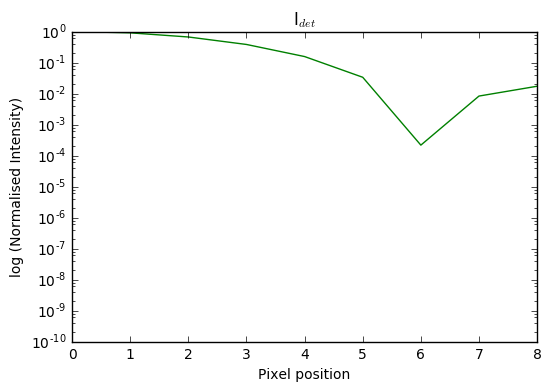

In [17]:
#The first minimum from the peak of the PSF

Maximum_1          = np.where(Idet_3[xc2,:] == max(Idet_3[xc2,:]))[0][0] #Finding the absolute maximum
Minimum_Location_1 = np.where(Idet_3[xc2,:] == min(Idet_3[xc2,Maximum_1-8:Maximum_1+8]))[0][0]
                       #Number of pixels from the maximum 
Distance = Maximum_1 -  Minimum_Location_1   

print('The minimum location in pixels is %g for a sampling of %i:'%(Distance, 5))

plt.figure()
plt.plot(xx2[xc2,:], Idet_3[xc2,:], c = 'g')
plt.title('I$_{det}$')
plt.xlabel('Pixel position')
plt.ylabel('log (Normalised Intensity)')
plt.yscale('log')
plt.xlim(0,8)

## Adding a tilt in the phase across the telescope pupil

The final exercise is to model a tilted wavefront incident on the lens. We do this by adding a 'ramp' in the x-direction that goes from $-3\pi$ to $+3\pi$ across the telescope pupil. 

You can use `mgrid` to get an x and y grid of points which will also be unnormalised ramps in both x and y, then subtract off the middle x value to make 0 be in the middle of the array, and then normalise the ramp to make it have the right amplitude.

**Q9 (4 points): ** Display the PSF. What has happened to the position of the PSF? By how far has it moved? Experiment with different multiples of $\pi$ for the ramp.

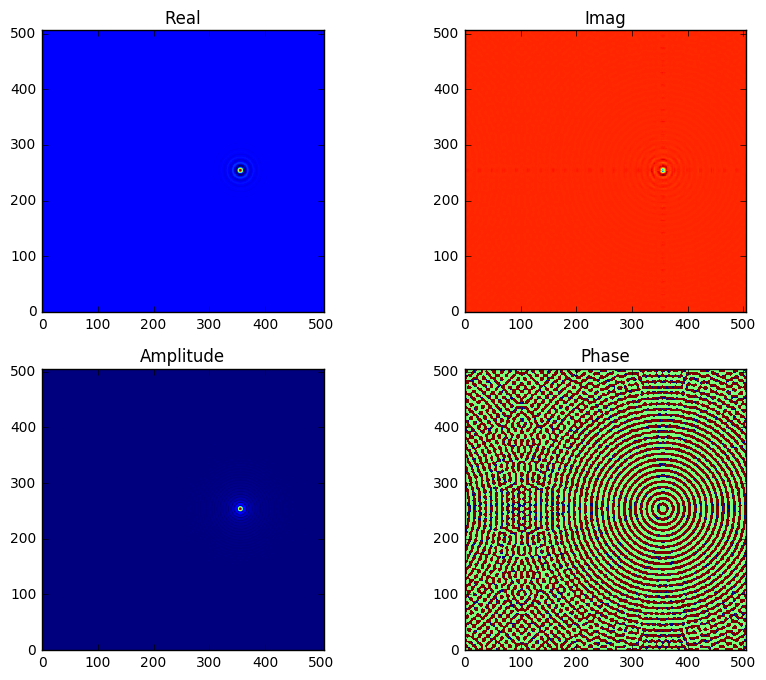

The PSF has been moved by a factor of 100


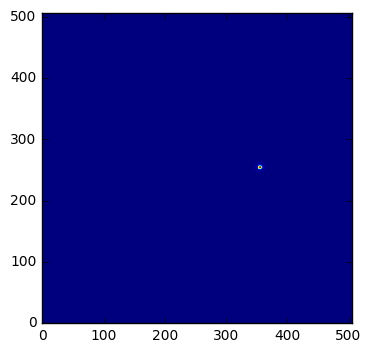

In [20]:
#Adding a tilt in the phase across the telescope pupil

npix_3   = 101
y_4, x_4 = np.mgrid[:npix_3,:npix_3] #Creating the ramp and making 0 the middle of the array
y_4, x_4 = (y_4, x_4) - np.mean(x_4)

x_4   = x_4/np.max(x_4)
Phase = 20.0*np.pi*x_4                 #Normalising and creating the phase

I_4 = Circle_1 * np.exp(1j*Phase)

#Carry out the FT of I_4 and add a spatial sampling of 5 by default
Edet_4 = FFT(I_4,5)

#Display the central part of Edet
displC(Edet_4)

Edet_4 = np.absolute(Edet_4)**2
Edet_4 = Edet_4 / np.amax(Edet_4)    

plt.imshow(Edet_4)

PSF_Shift = np.where(Edet_4[xc2,:] == np.max(Edet_4[xc2,:]))[0] - 254.0 #With 0.0pi the PSF is at 254.0.
print('The PSF has been moved by a factor of %g'%(PSF_Shift))

#The tilt in the phase (the light arrives to the telescope at a different angle) causes the PSF to shift.
#The larger the multiple of pi, the larger the shift. 
#The PSF is shifted by a factor # * sampling. In our case 100 because we used n = 20 and a samplin factor of 5.